In [75]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import time
from scipy import stats
from pylab import *
from matplotlib import rcParams

rcParams['text.usetex'] = True

In [76]:
MASS_EXPECTED = 5.972e+24

In [63]:
def read_csv(csv_file_path, numerify=True, delimiter=','):
    datas = []
    with open(csv_file_path) as csv_file:
        reader = csv.reader(csv_file, delimiter=delimiter)
        line_count = 0
        for row in reader:
            if line_count == 0:
                line_count += 1
                continue
            else:
                datas.append([(float(k) if numerify else k) for k in row])
    return datas

def attempt_parse_float(floatlike, fallback=None):
    try:
        return float(floatlike)
    except ValueError:
        return fallback

def calc_percent_error(actual, expected):
    return (abs(actual-expected)/expected)*100

In [64]:
nmeq_data = read_csv("data/all_sat_nmeq_mode_t2.csv")

In [65]:
meq_data = read_csv("data/new-analysis-meq.csv")

(array([496., 176.,  65., 430., 122.,  33.,  53.,  56.,  24.,  21.,  33.,
         27.,  16.,  18.,  24.,  27.,  29.,  15.,  52.,  21.,  47.,  37.,
         35.,  58.,  27.,  45.,  42.,  48.,  45.,  56.,  32.,  19.,  24.,
         29.,  18.,  17.,  18.,   6.,  21.,   7.,   5.,  10.,   6.,   2.,
         26.,   7.,   6.,   4.,  10.,  11.,   5.,   9.,  10.,  16.,   2.,
          7.,   5.,   7.,   3.,   2.,   6.,   6.,   1.,   8.,   2.,   5.,
          1.,   3.,   1.,   2.,   5.,   6.,   2.,   8.,   1.,   1.,   1.,
          2.,   2.,   1.,   1.,   1.,   3.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,
          2.]),
 array([0.        , 0.00054773, 0.00109546, 0.00164319, 0.00219092,
        0.00273865, 0.00328638, 0.00383412, 0.00438185, 0.00492958,
        0.00547731, 0.00602504, 0.00657277, 0.0071205 , 0.00766823,
        0.00821596, 0.00876369, 0.00931142, 0.00985915, 0.01040689,
        0.01095462, 0.01150235, 0.01205008, 0.

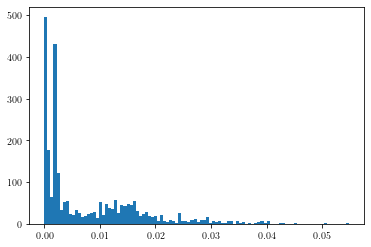

In [77]:
all_data = read_csv("data/ucs_database_08012020_clean.csv", numerify=False, delimiter='\t')
eccentricities = [attempt_parse_float(k[13]) for k in all_data]

eccentricities = np.sort(eccentricities)

plt.hist(eccentricities[:2600], bins=100)

### Determining the mass of the Earth using the nmeq method

In [96]:
nmeq_x = [a[0] for a in nmeq_data if True] # 
nmeq_y = [a[1] for a in nmeq_data]

# trim
nmeq_y = nmeq_y[:(len(nmeq_x))]

# sort
nmeq_x = np.sort(nmeq_x)
nmeq_y = np.sort(nmeq_y)

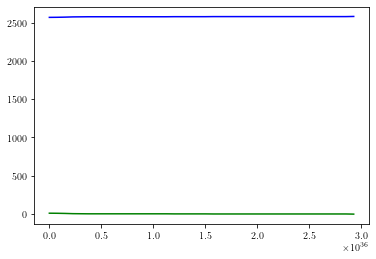

In [101]:
# plt.hist(nmeq_x, bins=200)
values, base = np.histogram(nmeq_x[:2580], bins=40)
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
#plot the survival function
plt.plot(base[:-1], len(nmeq_x[:2580])-cumulative, c='green')

plt.show()

<b>Graphical visualization</b>

1.5165465639499455e-25 128097884.62062073 0.9747529770816236 0.0 6.843297894348171e-28


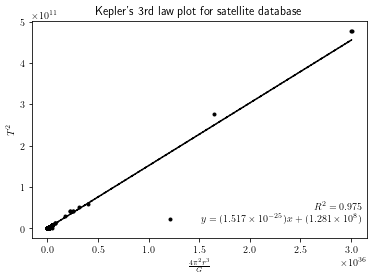

In [70]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(nmeq_x, nmeq_y)

nmeq_poly1d_fn = np.poly1d([slope, intercept])

print(slope, intercept, r_value, p_value, std_err)

plt.title("Kepler's 3rd law plot for satellite database")
plt.xlabel("$\\frac{4\pi^2 r^3}{G}$")
plt.ylabel("$T^2$")
plt.text(2.63e+36, 0.45e+11, "$R^2={}$".format(round(r_value, 3)))
plt.text(1.52e+36, 0.15e+11, "$y=(1.517\\times10^{-25})x+(1.281\\times10^8)$")
plt.plot(nmeq_x, nmeq_y, 'k.', nmeq_x, nmeq_poly1d_fn(nmeq_x), '--k')
plt.savefig("fig/nmeq_kepler_fig.png", dpi=300)

In [71]:
print("Mass estimation (method_lsrl_fit): {}".format(1/(slope)))
print("% error         (method_lsrl_fit): {}".format(calc_percent_error(1/slope, MASS_EXPECTED)))

Mass estimation (method_lsrl_fit): 6.593928757422615e+24
% error         (method_lsrl_fit): 10.414078322548807


**NMEQ method secondary method**

In [117]:
nmeq_mass = [a[2] for a in nmeq_data]
nmeq_mass = np.sort(nmeq_mass)
print(calc_percent_error(np.mean(nmeq_mass), MASS_EXPECTED))
print(calc_percent_error(np.median(nmeq_mass), MASS_EXPECTED))

6.968400227298291
0.1441728064300198


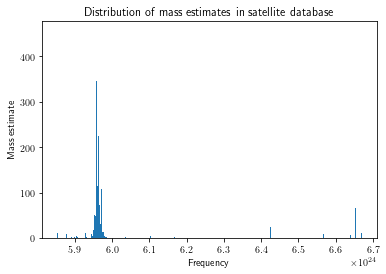

In [116]:
plt.title("Distribution of mass estimates in satellite database")
plt.xlabel("Frequency")
plt.ylabel("Mass estimate")
plt.hist(nmeq_mass[100:2500], bins=500)
plt.savefig("fig/nmeq_method2_hist.png", dpi=300)

### Determining the mass of the Earth using the meq method

At this point, meq_data is a collection with each row *r* containing:
* r[0]  = maximum tolerated eccentricity;
* r[1]  = kep_mass_mean;
* r[2]  = kep_mass_median;
* r[3]  = kep_mass_std_dev;
* r[4]  = kep_mass_std_dev_percent;
* r[5]  = kep_percent_error_mean;
* r[6]  = kep_percent_error_median;
* r[7]  = sec_mean;
* r[8]  = sec_median;
* r[9]  = sec_std_dev;
* r[10] = sec_percent_error_mean;
* r[11] = sec_percent_error_median;
* r[12] = sats_disqualified;
* r[13] = sats_used

Text(0.5, 1.0, 'Earth mass estimation ')

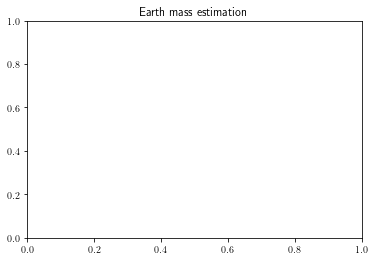

In [41]:
meq_plt0_x1 = []
meq_plt0_y1 = []

plt.title("Earth mass estimation ")

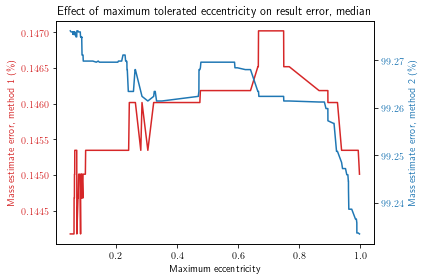

In [42]:
meq_plt1_x1 = [r[0] for r in meq_data if r[0] > 0.05]
meq_plt1_y1 = [calc_percent_error(r[2], MASS_EXPECTED) for r in meq_data if r[0] > 0.05]

meq_plt1_x2 = [r[0] for r in meq_data if r[0] > 0.05]
meq_plt1_y2 = [calc_percent_error(r[8], MASS_EXPECTED) for r in meq_data if r[0] > 0.05]

fig, ax1 = plt.subplots()

color = "tab:red"
ax1.set_xlabel("Maximum eccentricity")
ax1.set_ylabel("Mass estimate error, method 1 (\%)", color=color)
ax1.plot(meq_plt1_x1, meq_plt1_y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel('Mass estimate error, method 2 (\%)', color=color)
ax2.plot(meq_plt1_x2, meq_plt1_y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Effect of maximum tolerated eccentricity on result error, median")
fig.tight_layout()
plt.savefig("fig/meq_kepler_error_median_fig.png", dpi=300)

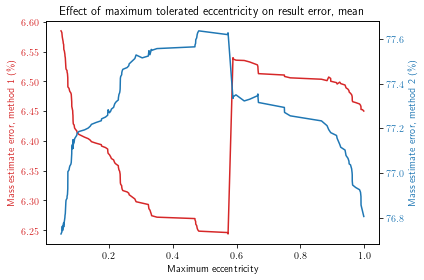

In [43]:
meq_plt2_x1 = [r[0] for r in meq_data if r[0] > 0.05]
meq_plt2_y1 = [calc_percent_error(r[1], MASS_EXPECTED) for r in meq_data if r[0] > 0.05]

meq_plt2_x2 = [r[0] for r in meq_data if r[0] > 0.05]
meq_plt2_y2 = [calc_percent_error(r[7], MASS_EXPECTED) for r in meq_data if r[0] > 0.05]

fig, ax1 = plt.subplots()

color = "tab:red"
ax1.set_xlabel("Maximum eccentricity")
ax1.set_ylabel("Mass estimate error, method 1 (\%)", color=color)
ax1.plot(meq_plt2_x1, meq_plt2_y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel('Mass estimate error, method 2 (\%)', color=color)
ax2.plot(meq_plt2_x2, meq_plt2_y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Effect of maximum tolerated eccentricity on result error, mean")
fig.tight_layout()
plt.savefig("fig/meq_kepler_error_mean_fig.png", dpi=300)